In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
import geopandas as gpd
import xarray as xr
import rioxarray
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import matplotlib as mpl
import calendar
from scipy import stats


In [8]:
shp_pan = gpd.read_file(r'Data\amazon\panamz.geojson')
cru = xr.open_dataset(r'Data\Datasets\clean\ts\cru_amz.nc')
chirps = xr.open_dataset(r'Data\Datasets\clean\ts\chirps_amz.nc')
era = xr.open_dataset(r'Data\Datasets\clean\ts\era_amz.nc')
gpcc = xr.open_dataset(r'Data\Datasets\clean\ts\gpcc_amz.nc')
terraclimate = xr.open_dataset(r'Data\Datasets\clean\ts\terraclimate_amz.nc')
worldclim = xr.open_dataset(r'Data\Datasets\clean\ts\worldclim_amz.nc')
datasets = [cru, chirps, era, gpcc, terraclimate, worldclim]
datasets_names = ['CRU', 'CHIRPS', 'ERA5', 'GPCC', 'TerraClimate', 'WorldClim']

## monthly ts

In [14]:
#create a dataframe with the maxx, minn, and amp for each year, with a collumn with datasetname
df = pd.DataFrame()
for i, ds in enumerate(datasets):
    df_temp = ds.mean(dim=['lat', 'lon']).to_dataframe()[['pr']].reset_index()
    df_temp['dataset'] = datasets_names[i]
    df = df.append(df_temp)

C:\Users\luisg\AppData\Local\Temp\ipykernel_3792\1119079626.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)
C:\Users\luisg\AppData\Local\Temp\ipykernel_3792\1119079626.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)
C:\Users\luisg\AppData\Local\Temp\ipykernel_3792\1119079626.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)
C:\Users\luisg\AppData\Local\Temp\ipykernel_3792\1119079626.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)
C:\Users\luisg\AppData\Local\Temp\ipykernel_3792\1119079626.py:6: FutureWarning: The frame.append me

In [39]:
#create a month collumn
df['month'] = df['time'].dt.month
# change numeric month to the name
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

Text(0, 0.5, 'Precipitation (mm/month)')

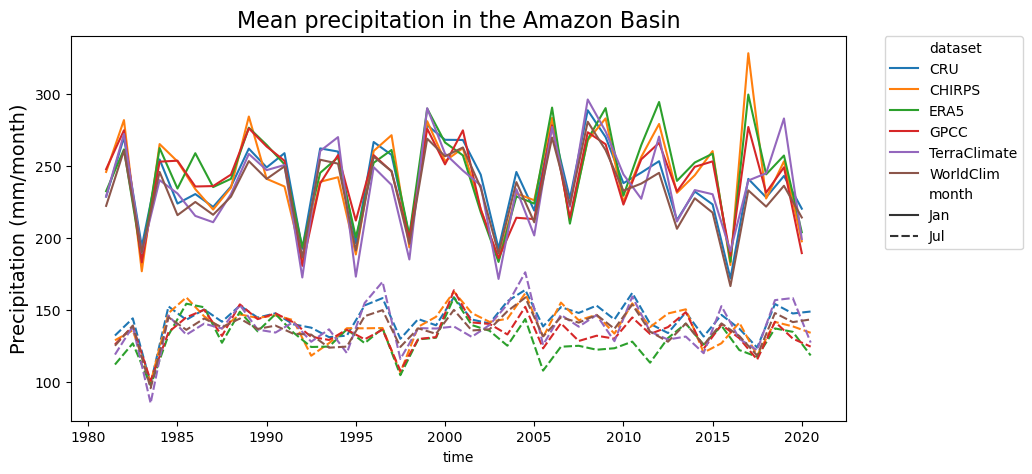

In [106]:
#get only data in Jan and July
df_plot = df[df.month.isin(['Jan', 'Jul'])]

#plot lineplot of january data
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df_plot, x='time', y='pr', hue='dataset', style='month', ax=ax, hue_order=datasets_names)
#put legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#set titles and labels
ax.set_title('Mean precipitation in the Amazon Basin', fontsize=16)
ax.set_ylabel('Precipitation (mm/month)', fontsize=14)


In [71]:
def df_corr(df, monthh):
    df_month = df[df.month == monthh]
    df_corr = pd.DataFrame()
    for dataset in df_month.dataset.unique():
        df_dataset = df_month[df_month.dataset == dataset]
        for dataset2 in df_month.dataset.unique():
            df_dataset2 = df_month[df_month.dataset == dataset2]
            corr = stats.pearsonr(df_dataset.pr.values, df_dataset2.pr.values)
            #print(dataset, dataset2, corr.statistic)
            df_corr = pd.concat([df_corr, pd.DataFrame({'dataset': dataset, 'dataset2': dataset2, 'corr': corr[0]}, index=[0])])
            #df_corr = df_corr.append({'dataset': dataset, 'dataset2': dataset2, 'corr': corr.statistic}, ignore_index=True)
    df_corr = df_corr.pivot(index='dataset', columns='dataset2', values='corr')
    return df_corr            

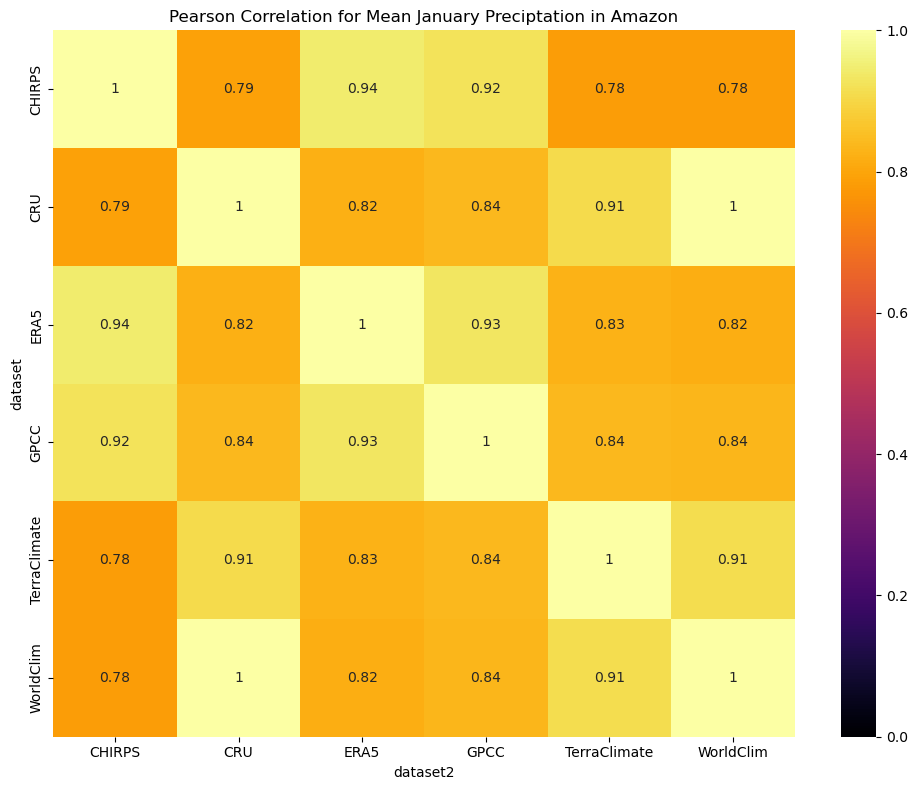

In [82]:
df_r_jan = df_corr(df, 'Jan')
#plot df_corr as heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_r_jan, annot=True, cmap='inferno', vmin=0, vmax=1, ax=ax)
ax.set_title('Pearson Correlation for Mean January Preciptation in Amazon')
plt.tight_layout()

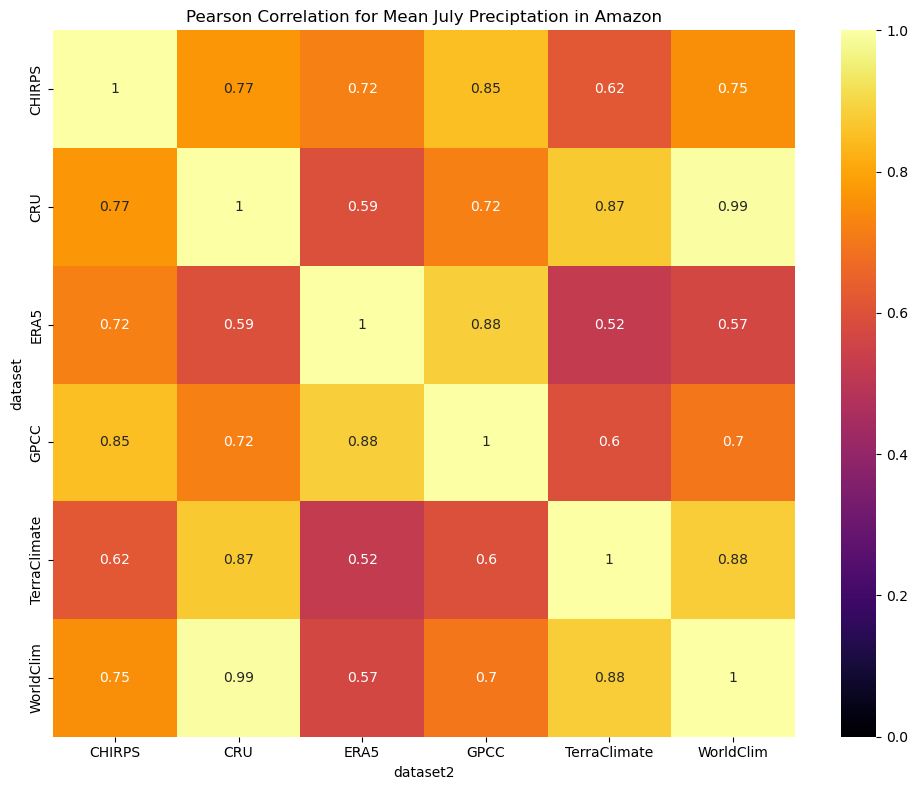

In [78]:
df_r_jul = df_corr(df, 'Jul')
#plot df_corr as heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_r_jul, annot=True, cmap='inferno', vmin=0, vmax=1, ax=ax)
ax.set_title('Pearson Correlation for Mean July Preciptation in Amazon')
plt.tight_layout()